In [202]:
import gzip
import gensim 
import gensim.downloader as api
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical 

import warnings
warnings.filterwarnings('ignore')


## Question 1 

In [ ]:
input_file = 'C:\\Users\\16286\\Desktop\\MSBA\Winter Quarter\\Machine Learning\\Assignment 7\\reviews_data.txt.gz'
#reviews_data.txt

with gzip.open (input_file, 'rb') as f:
        for i,line in enumerate (f):
            print(line)
            break

In [13]:
input_file = 'C:\\Users\\16286\\Desktop\\MSBA\Winter Quarter\\Machine Learning\\Assignment 7\\reviews_data.txt.gz'

def read_input2 (input_file):
    print("Function called")
    """This method reads the input file which is in gzip format"""
    logging.info("reading file {0}...this may take a while".format(input_file))
    with gzip.open(input_file, 'rb') as f:
        print("here")
        for i, line in enumerate(f):
            if (i % 10000 == 0):
                logging.info("read {0} reviews".format(i))
                print("Inside")
                
                if (i < 10):
                    print(line)
            # do some pre-processing and return list of words for each review
            # text
            yield gensim.utils.simple_preprocess(line)
       
documents = read_input2(input_file)

In [14]:
# build vocabulary and train model

#print(documents)
document2 = [x for x in documents]




2023-03-13 14:12:40,949 : INFO : reading file C:\Users\16286\Desktop\MSBA\Winter Quarter\Machine Learning\Assignment 7\reviews_data.txt.gz...this may take a while
2023-03-13 14:12:40,952 : INFO : read 0 reviews


Function called
here
Inside
b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to 

2023-03-13 14:12:42,409 : INFO : read 10000 reviews


Inside


2023-03-13 14:12:44,098 : INFO : read 20000 reviews


Inside


2023-03-13 14:12:45,857 : INFO : read 30000 reviews


Inside


2023-03-13 14:12:47,494 : INFO : read 40000 reviews


Inside


2023-03-13 14:12:49,366 : INFO : read 50000 reviews


Inside


2023-03-13 14:12:51,151 : INFO : read 60000 reviews


Inside


2023-03-13 14:12:52,700 : INFO : read 70000 reviews


Inside


2023-03-13 14:12:54,059 : INFO : read 80000 reviews


Inside


2023-03-13 14:12:55,526 : INFO : read 90000 reviews


Inside


2023-03-13 14:12:56,906 : INFO : read 100000 reviews


Inside


2023-03-13 14:12:58,628 : INFO : read 110000 reviews


Inside


2023-03-13 14:13:00,074 : INFO : read 120000 reviews


Inside


2023-03-13 14:13:01,566 : INFO : read 130000 reviews


Inside


2023-03-13 14:13:03,098 : INFO : read 140000 reviews


Inside


2023-03-13 14:13:04,530 : INFO : read 150000 reviews


Inside


2023-03-13 14:13:06,109 : INFO : read 160000 reviews


Inside


2023-03-13 14:13:07,409 : INFO : read 170000 reviews


Inside


2023-03-13 14:13:08,833 : INFO : read 180000 reviews


Inside


2023-03-13 14:13:10,658 : INFO : read 190000 reviews


Inside


2023-03-13 14:13:13,309 : INFO : read 200000 reviews


Inside


2023-03-13 14:13:15,084 : INFO : read 210000 reviews


Inside


2023-03-13 14:13:16,675 : INFO : read 220000 reviews


Inside


2023-03-13 14:13:18,105 : INFO : read 230000 reviews


Inside


2023-03-13 14:13:19,593 : INFO : read 240000 reviews


Inside


2023-03-13 14:13:21,041 : INFO : read 250000 reviews


Inside


In [15]:
Q1model = gensim.models.Word2Vec(document2,vector_size=150,window=10,min_count=2,workers=10, epochs = 10)


2023-03-13 14:13:30,018 : INFO : collecting all words and their counts
2023-03-13 14:13:30,020 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 14:13:30,211 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2023-03-13 14:13:30,397 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2023-03-13 14:13:30,639 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2023-03-13 14:13:30,851 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2023-03-13 14:13:31,090 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2023-03-13 14:13:31,329 : INFO : PROGRESS: at sentence #60000, processed 11013727 words, keeping 76787 word types
2023-03-13 14:13:31,526 : INFO : PROGRESS: at sentence #70000, processed 12637529 words, keeping 83200 word types
2023-03-13 14:13:31,723 : INFO : PROG

2023-03-13 14:14:01,348 : INFO : EPOCH 1 - PROGRESS: at 32.68% examples, 1520491 words/s, in_qsize 18, out_qsize 1
2023-03-13 14:14:02,351 : INFO : EPOCH 1 - PROGRESS: at 38.04% examples, 1523656 words/s, in_qsize 20, out_qsize 0
2023-03-13 14:14:03,354 : INFO : EPOCH 1 - PROGRESS: at 43.63% examples, 1525210 words/s, in_qsize 18, out_qsize 1
2023-03-13 14:14:04,356 : INFO : EPOCH 1 - PROGRESS: at 49.18% examples, 1527910 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:14:05,363 : INFO : EPOCH 1 - PROGRESS: at 54.25% examples, 1527430 words/s, in_qsize 20, out_qsize 0
2023-03-13 14:14:06,367 : INFO : EPOCH 1 - PROGRESS: at 59.65% examples, 1527963 words/s, in_qsize 20, out_qsize 1
2023-03-13 14:14:07,371 : INFO : EPOCH 1 - PROGRESS: at 65.09% examples, 1527285 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:14:08,371 : INFO : EPOCH 1 - PROGRESS: at 70.11% examples, 1528510 words/s, in_qsize 18, out_qsize 1
2023-03-13 14:14:09,374 : INFO : EPOCH 1 - PROGRESS: at 75.20% examples, 1526284

2023-03-13 14:15:11,272 : INFO : EPOCH 4 - PROGRESS: at 51.90% examples, 1337048 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:15:12,274 : INFO : EPOCH 4 - PROGRESS: at 57.05% examples, 1350625 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:15:13,274 : INFO : EPOCH 4 - PROGRESS: at 61.84% examples, 1353832 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:15:14,275 : INFO : EPOCH 4 - PROGRESS: at 66.69% examples, 1355592 words/s, in_qsize 20, out_qsize 0
2023-03-13 14:15:15,278 : INFO : EPOCH 4 - PROGRESS: at 71.85% examples, 1369079 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:15:16,278 : INFO : EPOCH 4 - PROGRESS: at 76.24% examples, 1365216 words/s, in_qsize 18, out_qsize 1
2023-03-13 14:15:17,288 : INFO : EPOCH 4 - PROGRESS: at 80.38% examples, 1360277 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:15:18,298 : INFO : EPOCH 4 - PROGRESS: at 84.76% examples, 1358776 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:15:19,302 : INFO : EPOCH 4 - PROGRESS: at 89.60% examples, 1359404

2023-03-13 14:16:20,411 : INFO : EPOCH 7 - PROGRESS: at 60.11% examples, 1420625 words/s, in_qsize 18, out_qsize 1
2023-03-13 14:16:21,413 : INFO : EPOCH 7 - PROGRESS: at 65.26% examples, 1421715 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:16:22,420 : INFO : EPOCH 7 - PROGRESS: at 70.01% examples, 1422930 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:16:23,428 : INFO : EPOCH 7 - PROGRESS: at 74.95% examples, 1424238 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:16:24,443 : INFO : EPOCH 7 - PROGRESS: at 79.45% examples, 1422701 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:16:25,448 : INFO : EPOCH 7 - PROGRESS: at 84.23% examples, 1423996 words/s, in_qsize 18, out_qsize 1
2023-03-13 14:16:26,459 : INFO : EPOCH 7 - PROGRESS: at 89.26% examples, 1424925 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:16:27,473 : INFO : EPOCH 7 - PROGRESS: at 94.28% examples, 1425612 words/s, in_qsize 17, out_qsize 2
2023-03-13 14:16:28,479 : INFO : EPOCH 7 - PROGRESS: at 99.27% examples, 1426391

In [16]:
Q1model.train(document2,total_examples=len(document2),epochs=10)

2023-03-13 14:17:15,789 : WARNING : Effective 'alpha' higher than previous training cycles
2023-03-13 14:17:15,791 : INFO : Word2Vec lifecycle event {'msg': 'training model with 10 workers on 70537 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10 shrink_windows=True', 'datetime': '2023-03-13T14:17:15.791848', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'train'}
2023-03-13 14:17:16,804 : INFO : EPOCH 0 - PROGRESS: at 4.22% examples, 1297694 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:17:17,806 : INFO : EPOCH 0 - PROGRESS: at 8.71% examples, 1345744 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:17:18,807 : INFO : EPOCH 0 - PROGRESS: at 12.34% examples, 1354006 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:17:19,811 : INFO : EPOCH 0 - PROGRESS: at 16.27% examples, 1349099 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:17:20,813 : INF

2023-03-13 14:18:23,102 : INFO : EPOCH 2 - PROGRESS: at 68.92% examples, 1233934 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:18:24,102 : INFO : EPOCH 2 - PROGRESS: at 73.33% examples, 1238980 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:18:25,109 : INFO : EPOCH 2 - PROGRESS: at 77.59% examples, 1243343 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:18:26,112 : INFO : EPOCH 2 - PROGRESS: at 82.02% examples, 1248660 words/s, in_qsize 20, out_qsize 0
2023-03-13 14:18:27,117 : INFO : EPOCH 2 - PROGRESS: at 86.42% examples, 1252563 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:18:28,117 : INFO : EPOCH 2 - PROGRESS: at 90.59% examples, 1248868 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:18:29,118 : INFO : EPOCH 2 - PROGRESS: at 94.95% examples, 1249716 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:18:30,129 : INFO : EPOCH 2 - PROGRESS: at 99.53% examples, 1252256 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:18:30,214 : INFO : EPOCH 2: training on 41519359 raw words (303472

2023-03-13 14:19:32,832 : INFO : EPOCH 5 - PROGRESS: at 33.74% examples, 1095273 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:19:33,836 : INFO : EPOCH 5 - PROGRESS: at 37.37% examples, 1090681 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:19:34,841 : INFO : EPOCH 5 - PROGRESS: at 41.44% examples, 1092360 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:19:35,845 : INFO : EPOCH 5 - PROGRESS: at 45.70% examples, 1098218 words/s, in_qsize 18, out_qsize 1
2023-03-13 14:19:36,852 : INFO : EPOCH 5 - PROGRESS: at 50.00% examples, 1107702 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:19:37,854 : INFO : EPOCH 5 - PROGRESS: at 53.70% examples, 1109004 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:19:38,859 : INFO : EPOCH 5 - PROGRESS: at 57.65% examples, 1109431 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:19:39,862 : INFO : EPOCH 5 - PROGRESS: at 62.07% examples, 1120101 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:19:40,873 : INFO : EPOCH 5 - PROGRESS: at 65.81% examples, 1115618

2023-03-13 14:20:44,883 : INFO : EPOCH 7 - PROGRESS: at 81.15% examples, 1074046 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:20:45,886 : INFO : EPOCH 7 - PROGRESS: at 85.56% examples, 1085464 words/s, in_qsize 18, out_qsize 1
2023-03-13 14:20:46,896 : INFO : EPOCH 7 - PROGRESS: at 90.12% examples, 1092389 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:20:47,898 : INFO : EPOCH 7 - PROGRESS: at 94.46% examples, 1098845 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:20:48,903 : INFO : EPOCH 7 - PROGRESS: at 98.97% examples, 1106244 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:20:49,118 : INFO : EPOCH 7: training on 41519359 raw words (30350773 effective words) took 27.4s, 1108507 effective words/s
2023-03-13 14:20:50,145 : INFO : EPOCH 8 - PROGRESS: at 3.48% examples, 1064551 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:20:51,151 : INFO : EPOCH 8 - PROGRESS: at 7.81% examples, 1197010 words/s, in_qsize 19, out_qsize 0
2023-03-13 14:20:52,160 : INFO : EPOCH 8 - PROGRESS: at 10.

(303495569, 415193590)

### Checking Q1 results 

In [17]:


w1 = "dirty"
print(Q1model.wv.most_similar (positive=w1))
# look up top 6 words similar to 'polite'
w1 = ["polite"]
print(Q1model.wv.most_similar (positive=w1,topn=6))
# look up top 6 words similar to 'france'
w1 = ["france"]
print(Q1model.wv.most_similar (positive=w1,topn=6))

[('filthy', 0.8624281287193298), ('stained', 0.7744951248168945), ('unclean', 0.7740045189857483), ('grubby', 0.769261360168457), ('smelly', 0.7508447170257568), ('dusty', 0.742133378982544), ('gross', 0.7297642827033997), ('dingy', 0.7263858318328857), ('soiled', 0.7259242534637451), ('mouldy', 0.7087249755859375)]
[('courteous', 0.9207490086555481), ('friendly', 0.8318106532096863), ('professional', 0.7916364669799805), ('cordial', 0.7883173227310181), ('attentive', 0.7752666473388672), ('personable', 0.7515801787376404)]
[('germany', 0.6645396947860718), ('canada', 0.6444250345230103), ('spain', 0.613652765750885), ('england', 0.5952774882316589), ('mexico', 0.5821581482887268), ('austria', 0.5786729454994202)]


### Question 2

In [174]:
IMDB_Data = pd.read_csv("IMDB Dataset.csv")
print(IMDB_Data.shape[0])
print(IMDB_Data.head())
IMDB_Data.info()

50000
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [213]:
def removebr(txt):
    ## Remove <br> tags
    r1 = txt.replace('<br />', ' ')
    
IMDB_Data['review'] = IMDB_Data['review'].apply(lambda x: removebr(x))    

In [175]:


IMDB_Data['updatedreview'] = IMDB_Data['review'].apply(lambda x: gensim.utils.simple_preprocess(x))
IMDB_Data.head(5)


,review,sentiment,updatedreview
0,One of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, br, br, the, f..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, this, was, wonderful, way, to, spend..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, family, where, little, boy,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, in, the, time, of, mone..."


### Tokenizing the data through which the reviews are broken down into individual words which can then be passed in the Word2Vec function. I also noticed \<br> symbols at the line end, so also removing these type of extra words to remove clutter 

### Data Split (80:20)

In [176]:
x1 = IMDB_Data[['review', 'updatedreview']]
y1 = IMDB_Data['sentiment' ]
IMDB_train,IMDB_test,Y_train ,Y_test = train_test_split(x1,y1, test_size= 0.20 , random_state=42)
print(IMDB_train.shape[0])
print(IMDB_test.shape[0])


40000
10000


In [106]:
####

##def read_input3 (IMDB_Data):
    ##print("Function called")

    ##for i in IMDB_Data['review']:

    ##    print("Inside")

  ##      yield gensim.utils.simple_preprocess(i)


##Review_Q2_Train = read_input3(IMDB_train)
##ListedReview_Q2_Train = [x for x in Review_Q2_Train]

##Review_Q2_Test = read_input3(IMDB_test)
##ListedReview_Q2_Test = [x for x in Review_Q2_Test]


### Deploy some more preprocessing techniques
        

### Question 3.1 (Running the Word2vec on IMDB)

In [21]:
Q2_model = gensim.models.Word2Vec(IMDB_train['updatedreview'],vector_size=100,sg = 1)

2023-03-13 14:29:41,828 : INFO : collecting all words and their counts
2023-03-13 14:29:41,829 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 14:29:42,132 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 14:29:42,439 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 14:29:42,861 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 14:29:43,192 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 14:29:43,193 : INFO : Creating a fresh vocabulary
2023-03-13 14:29:43,297 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T14:29:43.297757', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'p

2023-03-13 14:30:31,181 : INFO : EPOCH 2 - PROGRESS: at 80.56% examples, 411012 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:30:32,205 : INFO : EPOCH 2 - PROGRESS: at 86.45% examples, 408946 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:30:33,211 : INFO : EPOCH 2 - PROGRESS: at 92.19% examples, 407672 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:30:34,225 : INFO : EPOCH 2 - PROGRESS: at 97.99% examples, 405907 words/s, in_qsize 6, out_qsize 0
2023-03-13 14:30:34,554 : INFO : EPOCH 2: training on 8934662 raw words (6720015 effective words) took 16.6s, 405888 effective words/s
2023-03-13 14:30:35,579 : INFO : EPOCH 3 - PROGRESS: at 6.73% examples, 440886 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:30:36,623 : INFO : EPOCH 3 - PROGRESS: at 13.09% examples, 428674 words/s, in_qsize 6, out_qsize 0
2023-03-13 14:30:37,669 : INFO : EPOCH 3 - PROGRESS: at 18.52% examples, 403511 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:30:38,670 : INFO : EPOCH 3 - PROGRESS: at 23.69% examples, 38

In [23]:
Q2_model.train(IMDB_train['updatedreview'],total_examples=len(IMDB_train['updatedreview']),epochs=10)

2023-03-13 14:31:44,211 : WARNING : Effective 'alpha' higher than previous training cycles
2023-03-13 14:31:44,214 : INFO : Word2Vec lifecycle event {'msg': 'training model with 3 workers on 35633 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-03-13T14:31:44.214609', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'train'}
2023-03-13 14:31:45,228 : INFO : EPOCH 0 - PROGRESS: at 6.50% examples, 434304 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:31:46,260 : INFO : EPOCH 0 - PROGRESS: at 12.99% examples, 430897 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:31:47,272 : INFO : EPOCH 0 - PROGRESS: at 19.47% examples, 433615 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:31:48,297 : INFO : EPOCH 0 - PROGRESS: at 26.43% examples, 437095 words/s, in_qsize 6, out_qsize 0
2023-03-13 14:31:49,321 : INFO : EPOCH

2023-03-13 14:32:53,092 : INFO : EPOCH 3 - PROGRESS: at 16.80% examples, 278581 words/s, in_qsize 6, out_qsize 0
2023-03-13 14:32:54,115 : INFO : EPOCH 3 - PROGRESS: at 20.82% examples, 276222 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:32:55,122 : INFO : EPOCH 3 - PROGRESS: at 25.26% examples, 279217 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:32:56,178 : INFO : EPOCH 3 - PROGRESS: at 29.38% examples, 276105 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:32:57,212 : INFO : EPOCH 3 - PROGRESS: at 33.36% examples, 273756 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:32:58,240 : INFO : EPOCH 3 - PROGRESS: at 36.65% examples, 267269 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:32:59,242 : INFO : EPOCH 3 - PROGRESS: at 40.85% examples, 269275 words/s, in_qsize 6, out_qsize 0
2023-03-13 14:33:00,242 : INFO : EPOCH 3 - PROGRESS: at 45.18% examples, 270966 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:33:01,275 : INFO : EPOCH 3 - PROGRESS: at 49.09% examples, 270431 words/s, in_qsiz

2023-03-13 14:34:04,841 : INFO : EPOCH 6 - PROGRESS: at 93.39% examples, 387333 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:34:05,800 : INFO : EPOCH 6: training on 8934662 raw words (6721176 effective words) took 17.2s, 391575 effective words/s
2023-03-13 14:34:06,806 : INFO : EPOCH 7 - PROGRESS: at 6.63% examples, 442168 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:34:07,826 : INFO : EPOCH 7 - PROGRESS: at 12.99% examples, 434122 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:34:08,832 : INFO : EPOCH 7 - PROGRESS: at 17.80% examples, 397367 words/s, in_qsize 6, out_qsize 0
2023-03-13 14:34:09,839 : INFO : EPOCH 7 - PROGRESS: at 22.64% examples, 379214 words/s, in_qsize 6, out_qsize 0
2023-03-13 14:34:10,858 : INFO : EPOCH 7 - PROGRESS: at 28.09% examples, 374463 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:34:11,873 : INFO : EPOCH 7 - PROGRESS: at 35.01% examples, 388324 words/s, in_qsize 5, out_qsize 0
2023-03-13 14:34:12,880 : INFO : EPOCH 7 - PROGRESS: at 41.83% examples, 39

(67206626, 89346620)

In [26]:
## Checking the output #########

w1 = ["young"]
print(Q2_model.wv.most_similar (positive=w1,topn=6))
print(Q2_model.wv.get_vector("zombie"))

[('troubled', 0.6464856266975403), ('ebrahimi', 0.6415886282920837), ('mog', 0.6342411637306213), ('mariana', 0.6295545697212219), ('handsome', 0.6238566637039185), ('warfield', 0.6193918585777283)]
[-6.12430274e-01  6.89825043e-02 -1.42208502e-01 -1.07738398e-01
 -2.62281984e-01  1.32501274e-01 -5.39063551e-02  4.39915478e-01
 -2.06810787e-01 -3.73063907e-02 -1.01408176e-01  1.63968563e-01
  5.69339953e-02  3.65971029e-01 -2.67672449e-01 -2.07653746e-01
 -1.08247109e-01  4.82561393e-03 -2.08591595e-01 -5.61246693e-01
 -2.80038208e-01  1.06127433e-01 -2.30521441e-01 -2.41957575e-01
  8.73709098e-02 -2.57473379e-01  9.18977987e-03 -6.33504212e-01
 -3.21712077e-01  1.68682203e-01 -5.17715573e-01 -7.30429664e-02
  1.79836884e-01 -3.26542288e-01 -1.70771986e-01  4.03081059e-01
 -4.50244427e-01  2.30037309e-02  3.21084708e-01 -4.03400928e-01
  5.74988902e-01  5.92304347e-03 -1.98061630e-01  2.92986453e-01
  3.70595574e-01 -3.44799757e-01  7.25432858e-02 -1.41836330e-01
 -1.29319243e-02  5.1

In [109]:
print(Q2_model.epochs)

10


In [101]:
def document_vector(doc,**kwargs):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    #print(doc)
    for j in kwargs:
        model = kwargs[j]
    
    doc = [model.wv.get_vector(word) for word in doc if word in model.wv.key_to_index]
    #word_doc = [word for word in doc if word if word != 'abc']
    #print(doc)
    #print(word_doc)
    return np.mean(doc, axis=0)

In [104]:
### Updating the review content based on the word2vec for both test and train datasets

IMDB_train['doc_vector'] = IMDB_train['updatedreview'].apply(document_vector,model = (Q2_model))
print(IMDB_train.head())
print("hello")

IMDB_test['doc_vector'] = IMDB_test['updatedreview'].apply(document_vector,model = (Q2_model))

#test['doc_vector'] = test.ingredients.apply(document_vector)

                                                  review  \
39087  That's what I kept asking myself during the ma...   
30893  I did not watch the entire movie. I could not ...   
45278  A touching love story reminiscent of In the M...   
16398  This latter-day Fulci schlocker is a totally a...   
13653  First of all, I firmly believe that Norwegian ...   

                                           updatedreview  \
39087  [that, what, kept, asking, myself, during, the...   
30893  [did, not, watch, the, entire, movie, could, n...   
45278  [touching, love, story, reminiscent, of, in, t...   
16398  [this, latter, day, fulci, schlocker, is, tota...   
13653  [first, of, all, firmly, believe, that, norweg...   

                                              doc_vector  
39087  [-0.11100326, 0.089727774, 0.004746029, -0.033...  
30893  [-0.12238887, 0.08613449, 0.030092902, -0.0233...  
45278  [-0.13073657, 0.07731632, 0.0021488196, 0.0101...  
16398  [-0.1035551, 0.09942451, 0.02590310

In [105]:
## Setting up logistic regression ####

lb = LabelEncoder()
Ytrain_Updated = lb.fit_transform(Y_train)
LR = LogisticRegression(C=100)
X_train = list(IMDB_train['doc_vector'])



In [106]:
#print((IMDB_train['doc_vector'].to_numpy()))

## Logistic regression on Train dataset

Train_1 = LR.fit(X_train, Ytrain_Updated)
Train_Score = LR.score(X_train, Ytrain_Updated)
print("Accuracy Score for train dataset is "+str(Train_Score))


0.873775


In [107]:
## Logistic regression on test dataset

X_test = list(IMDB_test['doc_vector'])
Y_test_encoded = lb.fit_transform(Y_test)

Test_Score = LR.score(X_test, Y_test_encoded)
print("Accuracy Score for test dataset is "+str(Test_Score))


0.8709


In [70]:

# Get Unique Count using Series.unique()
count = IMDB_Data.sentiment.value_counts()
print("Unique values count : "+ str(count))

# Output
# Unique values count : 4




Unique values count : positive    25000
negative    25000
Name: sentiment, dtype: int64


### Over here, we see that the count of positive and negative reviews are balanced. So it is okay to just use the accuracy metric to evaluate model performance

## Question 3.2

In [111]:
def Model_Vector(Vec_size, window_size):
    
    Model = gensim.models.Word2Vec(IMDB_train['updatedreview'],vector_size=Vec_size,window = window_size,sg = 1)
    Model.train(IMDB_train['updatedreview'],total_examples=len(IMDB_train['updatedreview']),epochs=Model.epochs)
    #Q2_model.train(IMDB_train['updatedreview'],total_examples=len(IMDB_train['updatedreview']),epochs=10)
    
    return Model
   

In [119]:
Vec_Size = [25,50,100,150]

Train_Accuracy = []
Test_Accuracy = []
Model_Array = []

lb = LabelEncoder()

LR = LogisticRegression(C=100)

Ytrain_Updated = lb.fit_transform(Y_train)
Ytest_Updated = lb.fit_transform(Y_test)

for i in Vec_Size:
    
    print("loop running for ith value:"+str(i))
    #Default window size is 5
    
    Itr_Model = Model_Vector(i,5) 
    Model_Array.append(Itr_Model)
    
    Result_Vec_Train = IMDB_train['updatedreview'].apply(document_vector,model = (Itr_Model))
    Result_Vec_Test = IMDB_test['updatedreview'].apply(document_vector,model = (Itr_Model))

    
    List_Final_X_Train = list(Result_Vec_Train)
    List_Final_X_Test = list(Result_Vec_Test)
    
    Train_1 = LR.fit(List_Final_X_Train, Ytrain_Updated)
    Train_Score = LR.score(List_Final_X_Train, Ytrain_Updated)
    print(Train_Score)    
    Train_Accuracy.append(Train_Score)
    
    Test_Score = LR.score(List_Final_X_Test, Ytest_Updated)
    print(Test_Score)    
    Test_Accuracy.append(Test_Score)
    
#return List_Final_X     
    
    
    
  
    




2023-03-13 18:35:04,185 : INFO : collecting all words and their counts
2023-03-13 18:35:04,186 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


loop running for ith value:25


2023-03-13 18:35:04,419 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 18:35:04,647 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 18:35:04,885 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 18:35:05,160 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 18:35:05,161 : INFO : Creating a fresh vocabulary
2023-03-13 18:35:05,251 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T18:35:05.251925', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-03-13 18:35:05,252 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 8843902 w

2023-03-13 18:35:51,832 : INFO : EPOCH 4: training on 8934662 raw words (6720570 effective words) took 11.3s, 596881 effective words/s
2023-03-13 18:35:51,833 : INFO : Word2Vec lifecycle event {'msg': 'training on 44673310 raw words (33600499 effective words) took 46.3s, 725508 effective words/s', 'datetime': '2023-03-13T18:35:51.833199', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'train'}
2023-03-13 18:35:51,834 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=35633, vector_size=25, alpha=0.025>', 'datetime': '2023-03-13T18:35:51.834784', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2023-03-13 18:35:51,835 : WARNING : Effective 'alpha' higher than previous training cycles
2023-03-13 18:35:51,836 : INFO : Word2Vec lifecycle event

0.830925
0.8281
loop running for ith value:50


2023-03-13 18:36:46,185 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 18:36:46,408 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 18:36:46,621 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 18:36:46,850 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 18:36:46,850 : INFO : Creating a fresh vocabulary
2023-03-13 18:36:46,928 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T18:36:46.928314', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-03-13 18:36:46,929 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 8843902 w

2023-03-13 18:37:36,278 : INFO : EPOCH 4 - PROGRESS: at 90.08% examples, 667263 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:37:37,247 : INFO : EPOCH 4: training on 8934662 raw words (6719497 effective words) took 10.0s, 669120 effective words/s
2023-03-13 18:37:37,249 : INFO : Word2Vec lifecycle event {'msg': 'training on 44673310 raw words (33601162 effective words) took 50.1s, 671120 effective words/s', 'datetime': '2023-03-13T18:37:37.249440', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'train'}
2023-03-13 18:37:37,249 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=35633, vector_size=50, alpha=0.025>', 'datetime': '2023-03-13T18:37:37.249440', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2023-03-13 18:37:37,250 : WARNING :

0.86205
0.857
loop running for ith value:100


2023-03-13 18:38:38,124 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 18:38:38,333 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 18:38:38,559 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 18:38:38,782 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 18:38:38,783 : INFO : Creating a fresh vocabulary
2023-03-13 18:38:38,860 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T18:38:38.860610', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-03-13 18:38:38,861 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 8843902 w

2023-03-13 18:39:26,552 : INFO : EPOCH 3 - PROGRESS: at 28.30% examples, 471260 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:39:27,571 : INFO : EPOCH 3 - PROGRESS: at 35.92% examples, 477035 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:39:28,594 : INFO : EPOCH 3 - PROGRESS: at 43.26% examples, 479292 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:39:29,614 : INFO : EPOCH 3 - PROGRESS: at 50.09% examples, 476121 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:39:30,647 : INFO : EPOCH 3 - PROGRESS: at 57.58% examples, 478273 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:39:31,648 : INFO : EPOCH 3 - PROGRESS: at 65.28% examples, 481615 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:39:32,666 : INFO : EPOCH 3 - PROGRESS: at 72.85% examples, 482615 words/s, in_qsize 4, out_qsize 1
2023-03-13 18:39:33,667 : INFO : EPOCH 3 - PROGRESS: at 80.71% examples, 486158 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:39:34,692 : INFO : EPOCH 3 - PROGRESS: at 88.10% examples, 485866 words/s, in_qsiz

2023-03-13 18:40:26,970 : INFO : EPOCH 2 - PROGRESS: at 69.77% examples, 464605 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:40:27,973 : INFO : EPOCH 2 - PROGRESS: at 77.05% examples, 465739 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:40:28,979 : INFO : EPOCH 2 - PROGRESS: at 84.25% examples, 466675 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:40:29,981 : INFO : EPOCH 2 - PROGRESS: at 91.13% examples, 466477 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:40:30,982 : INFO : EPOCH 2 - PROGRESS: at 98.11% examples, 466437 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:40:31,232 : INFO : EPOCH 2: training on 8934662 raw words (6722823 effective words) took 14.4s, 467091 effective words/s
2023-03-13 18:40:32,244 : INFO : EPOCH 3 - PROGRESS: at 6.96% examples, 461682 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:40:33,276 : INFO : EPOCH 3 - PROGRESS: at 13.99% examples, 466730 words/s, in_qsize 6, out_qsize 2
2023-03-13 18:40:34,285 : INFO : EPOCH 3 - PROGRESS: at 20.93% examples, 46

0.873775
0.87
loop running for ith value:150


2023-03-13 18:41:12,131 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 18:41:12,365 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 18:41:12,599 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 18:41:12,832 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 18:41:12,833 : INFO : Creating a fresh vocabulary
2023-03-13 18:41:12,909 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T18:41:12.909873', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-03-13 18:41:12,910 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 8843902 w

2023-03-13 18:42:02,607 : INFO : EPOCH 2 - PROGRESS: at 75.29% examples, 384739 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:42:03,610 : INFO : EPOCH 2 - PROGRESS: at 81.03% examples, 384559 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:42:04,620 : INFO : EPOCH 2 - PROGRESS: at 86.78% examples, 384259 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:42:05,622 : INFO : EPOCH 2 - PROGRESS: at 92.55% examples, 384724 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:42:06,628 : INFO : EPOCH 2 - PROGRESS: at 98.55% examples, 385420 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:42:06,860 : INFO : EPOCH 2: training on 8934662 raw words (6722132 effective words) took 17.4s, 385874 effective words/s
2023-03-13 18:42:07,863 : INFO : EPOCH 3 - PROGRESS: at 5.80% examples, 385441 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:42:08,867 : INFO : EPOCH 3 - PROGRESS: at 11.56% examples, 391053 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:42:09,902 : INFO : EPOCH 3 - PROGRESS: at 17.60% examples, 39

2023-03-13 18:43:02,345 : INFO : EPOCH 1 - PROGRESS: at 22.86% examples, 380437 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:43:03,363 : INFO : EPOCH 1 - PROGRESS: at 28.60% examples, 379807 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:43:04,382 : INFO : EPOCH 1 - PROGRESS: at 34.45% examples, 380521 words/s, in_qsize 6, out_qsize 1
2023-03-13 18:43:05,392 : INFO : EPOCH 1 - PROGRESS: at 40.35% examples, 382715 words/s, in_qsize 5, out_qsize 1
2023-03-13 18:43:06,411 : INFO : EPOCH 1 - PROGRESS: at 46.20% examples, 383737 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:43:07,414 : INFO : EPOCH 1 - PROGRESS: at 52.04% examples, 385325 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:43:08,424 : INFO : EPOCH 1 - PROGRESS: at 57.91% examples, 386223 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:43:09,448 : INFO : EPOCH 1 - PROGRESS: at 63.95% examples, 386596 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:43:10,456 : INFO : EPOCH 1 - PROGRESS: at 69.66% examples, 386040 words/s, in_qsiz

0.881175
0.8772


[0.8281, 0.857, 0.87, 0.8772]
[0.830925, 0.86205, 0.873775, 0.881175]


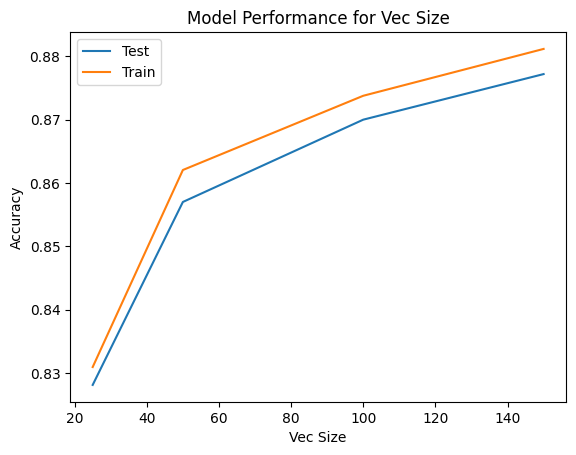

In [199]:
print(Test_Accuracy)
print(Train_Accuracy)

plt.plot(Vec_Size,Test_Accuracy ,label = "Test")
plt.plot(Vec_Size, Train_Accuracy,label = "Train")
plt.legend(loc="upper left")
plt.title("Model Performance for Vec Size")
plt.xlabel("Vec Size")
plt.ylabel("Accuracy")
plt.show()

#### As we increase the vector size, we expect the accuracy to improve. Because generally as we lower the vector size, we do leave out some information. Leaving out information may effect understanding the review correctly, so we should not have a lower vector size. Also, we expect after a certain vector size, the margingal increase will not be very high. As a certain vector size will capture most of the meaningful aspects

#### The graph above depicts the expected behaviour where we have lowest accuracy for vec size as 25 and highest for vec size for 150. Although at some point, we see that the accuracy will converge to a particular value and will have no effect upon increasing vector size.

In [121]:
Window_Size = [2,3,5,10]

Train_Accuracy2 = []
Test_Accuracy2 = []
Model_Array2 = []

lb = LabelEncoder()

LR = LogisticRegression(C=100)

Ytrain_Updated = lb.fit_transform(Y_train)
Ytest_Updated = lb.fit_transform(Y_test)

for i in Window_Size:
    
    print("loop running for ith value:"+str(i))
    #Default vector size is 100
    
    Itr_Model = Model_Vector(100,i) 
    Model_Array2.append(Itr_Model)
    
    Result_Vec_Train = IMDB_train['updatedreview'].apply(document_vector,model = (Itr_Model))
    Result_Vec_Test = IMDB_test['updatedreview'].apply(document_vector,model = (Itr_Model))

    
    List_Final_X_Train = list(Result_Vec_Train)
    List_Final_X_Test = list(Result_Vec_Test)
    
    Train_1 = LR.fit(List_Final_X_Train, Ytrain_Updated)
    Train_Score = LR.score(List_Final_X_Train, Ytrain_Updated)
    print(Train_Score)    
    Train_Accuracy2.append(Train_Score)
    
    Test_Score = LR.score(List_Final_X_Test, Ytest_Updated)
    print(Test_Score)    
    Test_Accuracy2.append(Test_Score)

2023-03-13 18:44:18,254 : INFO : collecting all words and their counts
2023-03-13 18:44:18,255 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


loop running for ith value:2


2023-03-13 18:44:18,478 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 18:44:18,699 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 18:44:18,913 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 18:44:19,128 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 18:44:19,129 : INFO : Creating a fresh vocabulary
2023-03-13 18:44:19,207 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T18:44:19.207174', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-03-13 18:44:19,208 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 8843902 w

2023-03-13 18:44:58,700 : INFO : Word2Vec lifecycle event {'msg': 'training model with 3 workers on 35633 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=2 shrink_windows=True', 'datetime': '2023-03-13T18:44:58.700341', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'train'}
2023-03-13 18:44:59,707 : INFO : EPOCH 0 - PROGRESS: at 10.56% examples, 708757 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:45:00,708 : INFO : EPOCH 0 - PROGRESS: at 22.65% examples, 763738 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:45:01,716 : INFO : EPOCH 0 - PROGRESS: at 35.01% examples, 782902 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:45:02,728 : INFO : EPOCH 0 - PROGRESS: at 48.79% examples, 819306 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:45:03,730 : INFO : EPOCH 0 - PROGRESS: at 61.52% examples, 826671 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:4

0.858275
0.8576
loop running for ith value:3


2023-03-13 18:45:49,743 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 18:45:49,980 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 18:45:50,214 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 18:45:50,455 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 18:45:50,456 : INFO : Creating a fresh vocabulary
2023-03-13 18:45:50,543 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T18:45:50.543494', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-03-13 18:45:50,544 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 8843902 w

2023-03-13 18:46:39,001 : INFO : EPOCH 4 - PROGRESS: at 92.78% examples, 690049 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:46:39,712 : INFO : EPOCH 4: training on 8934662 raw words (6720829 effective words) took 9.8s, 689023 effective words/s
2023-03-13 18:46:39,714 : INFO : Word2Vec lifecycle event {'msg': 'training on 44673310 raw words (33606068 effective words) took 48.9s, 687506 effective words/s', 'datetime': '2023-03-13T18:46:39.714710', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'train'}
2023-03-13 18:46:39,714 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=35633, vector_size=100, alpha=0.025>', 'datetime': '2023-03-13T18:46:39.714710', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2023-03-13 18:46:39,716 : WARNING :

0.865075
0.861
loop running for ith value:5


2023-03-13 18:47:40,189 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 18:47:40,415 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 18:47:40,643 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 18:47:40,874 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 18:47:40,875 : INFO : Creating a fresh vocabulary
2023-03-13 18:47:40,954 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T18:47:40.954457', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-03-13 18:47:40,955 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 8843902 w

2023-03-13 18:48:29,402 : INFO : EPOCH 3 - PROGRESS: at 60.73% examples, 506551 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:48:30,406 : INFO : EPOCH 3 - PROGRESS: at 68.42% examples, 507389 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:48:31,406 : INFO : EPOCH 3 - PROGRESS: at 76.19% examples, 507410 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:48:32,411 : INFO : EPOCH 3 - PROGRESS: at 83.93% examples, 507918 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:48:33,422 : INFO : EPOCH 3 - PROGRESS: at 91.56% examples, 508236 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:48:34,430 : INFO : EPOCH 3 - PROGRESS: at 99.33% examples, 508643 words/s, in_qsize 5, out_qsize 1
2023-03-13 18:48:34,505 : INFO : EPOCH 3: training on 8934662 raw words (6719702 effective words) took 13.2s, 509151 effective words/s
2023-03-13 18:48:35,523 : INFO : EPOCH 4 - PROGRESS: at 7.63% examples, 503303 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:48:36,529 : INFO : EPOCH 4 - PROGRESS: at 15.12% examples, 50

2023-03-13 18:49:27,306 : INFO : EPOCH 2 - PROGRESS: at 97.87% examples, 502303 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:49:27,637 : INFO : EPOCH 2: training on 8934662 raw words (6720232 effective words) took 13.4s, 500403 effective words/s
2023-03-13 18:49:28,659 : INFO : EPOCH 3 - PROGRESS: at 5.47% examples, 357557 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:49:29,676 : INFO : EPOCH 3 - PROGRESS: at 10.46% examples, 345715 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:49:30,691 : INFO : EPOCH 3 - PROGRESS: at 16.69% examples, 370904 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:49:31,694 : INFO : EPOCH 3 - PROGRESS: at 23.48% examples, 392215 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:49:32,699 : INFO : EPOCH 3 - PROGRESS: at 30.21% examples, 403412 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:49:33,720 : INFO : EPOCH 3 - PROGRESS: at 37.08% examples, 410987 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:49:34,734 : INFO : EPOCH 3 - PROGRESS: at 43.91% examples, 41

0.873925
0.8706
loop running for ith value:10


2023-03-13 18:50:12,054 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 18:50:12,328 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 18:50:12,595 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 18:50:12,846 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 18:50:12,847 : INFO : Creating a fresh vocabulary
2023-03-13 18:50:12,932 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T18:50:12.932118', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-03-13 18:50:12,933 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 8843902 w

2023-03-13 18:51:04,305 : INFO : EPOCH 1 - PROGRESS: at 96.87% examples, 265859 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:51:05,068 : INFO : EPOCH 1: training on 8934662 raw words (6721592 effective words) took 25.3s, 266074 effective words/s
2023-03-13 18:51:06,095 : INFO : EPOCH 2 - PROGRESS: at 4.04% examples, 260346 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:51:07,101 : INFO : EPOCH 2 - PROGRESS: at 8.19% examples, 269808 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:51:08,108 : INFO : EPOCH 2 - PROGRESS: at 12.14% examples, 270112 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:51:09,157 : INFO : EPOCH 2 - PROGRESS: at 15.99% examples, 265872 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:51:10,189 : INFO : EPOCH 2 - PROGRESS: at 20.05% examples, 265869 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:51:11,191 : INFO : EPOCH 2 - PROGRESS: at 24.03% examples, 265811 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:51:12,242 : INFO : EPOCH 2 - PROGRESS: at 28.30% examples, 266

2023-03-13 18:52:16,729 : INFO : EPOCH 4 - PROGRESS: at 74.23% examples, 272271 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:52:17,741 : INFO : EPOCH 4 - PROGRESS: at 78.58% examples, 272896 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:52:18,763 : INFO : EPOCH 4 - PROGRESS: at 82.52% examples, 272238 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:52:19,793 : INFO : EPOCH 4 - PROGRESS: at 86.67% examples, 271896 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:52:20,821 : INFO : EPOCH 4 - PROGRESS: at 90.83% examples, 271968 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:52:21,837 : INFO : EPOCH 4 - PROGRESS: at 95.05% examples, 272184 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:52:22,852 : INFO : EPOCH 4 - PROGRESS: at 99.11% examples, 272048 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:52:23,083 : INFO : EPOCH 4: training on 8934662 raw words (6720254 effective words) took 24.7s, 271945 effective words/s
2023-03-13 18:52:23,083 : INFO : Word2Vec lifecycle event {'msg': 'trainin

2023-03-13 18:53:18,896 : INFO : EPOCH 2 - PROGRESS: at 19.47% examples, 260160 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:53:19,903 : INFO : EPOCH 2 - PROGRESS: at 23.48% examples, 260857 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:53:20,916 : INFO : EPOCH 2 - PROGRESS: at 27.42% examples, 260154 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:53:21,942 : INFO : EPOCH 2 - PROGRESS: at 31.61% examples, 261885 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:53:22,968 : INFO : EPOCH 2 - PROGRESS: at 35.80% examples, 263143 words/s, in_qsize 5, out_qsize 0
2023-03-13 18:53:23,981 : INFO : EPOCH 2 - PROGRESS: at 39.93% examples, 264649 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:53:25,005 : INFO : EPOCH 2 - PROGRESS: at 44.00% examples, 265414 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:53:26,022 : INFO : EPOCH 2 - PROGRESS: at 48.22% examples, 266946 words/s, in_qsize 6, out_qsize 0
2023-03-13 18:53:27,057 : INFO : EPOCH 2 - PROGRESS: at 52.34% examples, 267242 words/s, in_qsiz

0.882725
0.8808


[0.8576, 0.861, 0.8706, 0.8808]
[0.858275, 0.865075, 0.873925, 0.882725]


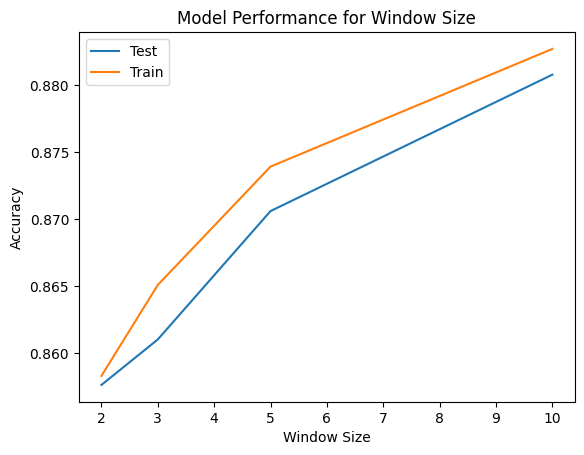

In [200]:
print(Test_Accuracy2)
print(Train_Accuracy2)

plt.plot(Window_Size,Test_Accuracy2 ,label = "Test")
plt.plot(Window_Size, Train_Accuracy2,label = "Train")
plt.legend(loc="upper left")
plt.title("Model Performance for Window Size")
plt.xlabel("Window Size")
plt.ylabel("Accuracy")
plt.show()

#### For different window size, we expect as the window size increases the accuracy of the model should improve because having higer window size mean incorporating more words to understand the context of a word.



#### From the above graph, we can verify that increasing the window size does increase the accuracy. We have lowest accuracy for window size 2 and highest for window size = 10

### Question 4.1

##### I belive that the way RNN models would be better than simple logistic regression because RNNs can structured in a way to interpret the order of words in which they appear. So RNN can more effectively capture the context of a word. For example - Dish A and Dish B is a deadly combination, where deadly is used as a positive word but in simple logistic regresion it may be interpreted as a negative word  

### Question 4.2 - Word2Vec embeddings

In [161]:
######  Question 4.1

from tensorflow.keras.layers import TextVectorization

vectorizer = TextVectorization(max_tokens=20000)
text_ds = tf.data.Dataset.from_tensor_slices(IMDB_train['review']).batch(128)
vectorizer.adapt(text_ds)
  


"""
You can retrieve the computed vocabulary used via `vectorizer.get_vocabulary()`. Let's
print the top 5 words:
"""

print(vectorizer.get_vocabulary()[:5])

"""
Let's vectorize a test sentence:
"""

output = vectorizer([["the cat sat on the mat"]])
print(output.numpy()[0, :6])

"""
As you can see, "the" gets represented as "2". Why not 0, given that "the" was the first
word in the vocabulary? That's because index 0 is reserved for padding and index 1 is
reserved for "out of vocabulary" tokens.

Here's a dict mapping words to their indices:
"""

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

len(voc)




['', '[UNK]', 'the', 'and', 'a']
[    2  1213  1724    21     2 15057]


20000

In [130]:
Q4_model = gensim.models.Word2Vec(IMDB_train['updatedreview'],vector_size=300,sg = 1)
Q4_model.wv.save_word2vec_format('Q4_Model_Word2Vec.txt', binary=False)



2023-03-13 21:49:03,127 : INFO : collecting all words and their counts
2023-03-13 21:49:03,142 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-13 21:49:04,845 : INFO : PROGRESS: at sentence #10000, processed 2247945 words, keeping 51708 word types
2023-03-13 21:49:05,409 : INFO : PROGRESS: at sentence #20000, processed 4491090 words, keeping 68759 word types
2023-03-13 21:49:05,844 : INFO : PROGRESS: at sentence #30000, processed 6711920 words, keeping 81013 word types
2023-03-13 21:49:06,271 : INFO : collected 90876 word types from a corpus of 8934662 raw words and 40000 sentences
2023-03-13 21:49:06,275 : INFO : Creating a fresh vocabulary
2023-03-13 21:49:06,405 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 35633 unique words (39.21% of original 90876, drops 55243)', 'datetime': '2023-03-13T21:49:06.405153', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'p

2023-03-13 21:49:56,149 : INFO : EPOCH 1 - PROGRESS: at 58.59% examples, 213975 words/s, in_qsize 5, out_qsize 0
2023-03-13 21:49:57,190 : INFO : EPOCH 1 - PROGRESS: at 62.45% examples, 215510 words/s, in_qsize 5, out_qsize 0
2023-03-13 21:49:58,204 : INFO : EPOCH 1 - PROGRESS: at 65.56% examples, 215233 words/s, in_qsize 6, out_qsize 0
2023-03-13 21:49:59,220 : INFO : EPOCH 1 - PROGRESS: at 68.31% examples, 213645 words/s, in_qsize 4, out_qsize 1
2023-03-13 21:50:00,288 : INFO : EPOCH 1 - PROGRESS: at 71.43% examples, 212635 words/s, in_qsize 5, out_qsize 0
2023-03-13 21:50:01,335 : INFO : EPOCH 1 - PROGRESS: at 75.04% examples, 213212 words/s, in_qsize 6, out_qsize 0
2023-03-13 21:50:02,339 : INFO : EPOCH 1 - PROGRESS: at 78.81% examples, 214669 words/s, in_qsize 5, out_qsize 0
2023-03-13 21:50:03,407 : INFO : EPOCH 1 - PROGRESS: at 82.42% examples, 215221 words/s, in_qsize 6, out_qsize 0
2023-03-13 21:50:04,432 : INFO : EPOCH 1 - PROGRESS: at 86.35% examples, 216646 words/s, in_qsiz

2023-03-13 21:51:08,802 : INFO : EPOCH 4 - PROGRESS: at 3.69% examples, 237446 words/s, in_qsize 5, out_qsize 0
2023-03-13 21:51:09,871 : INFO : EPOCH 4 - PROGRESS: at 7.53% examples, 239858 words/s, in_qsize 5, out_qsize 0
2023-03-13 21:51:10,898 : INFO : EPOCH 4 - PROGRESS: at 11.24% examples, 243653 words/s, in_qsize 6, out_qsize 0
2023-03-13 21:51:11,909 : INFO : EPOCH 4 - PROGRESS: at 14.44% examples, 237337 words/s, in_qsize 6, out_qsize 0
2023-03-13 21:51:12,938 : INFO : EPOCH 4 - PROGRESS: at 17.37% examples, 227390 words/s, in_qsize 5, out_qsize 0
2023-03-13 21:51:13,954 : INFO : EPOCH 4 - PROGRESS: at 20.05% examples, 219900 words/s, in_qsize 6, out_qsize 0
2023-03-13 21:51:14,955 : INFO : EPOCH 4 - PROGRESS: at 23.48% examples, 221156 words/s, in_qsize 6, out_qsize 0
2023-03-13 21:51:15,963 : INFO : EPOCH 4 - PROGRESS: at 27.10% examples, 222895 words/s, in_qsize 5, out_qsize 0
2023-03-13 21:51:16,976 : INFO : EPOCH 4 - PROGRESS: at 30.80% examples, 225701 words/s, in_qsize 

In [131]:
embeddings_index = {}
with open("Q4_Model_Word2Vec.txt", encoding='utf8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 35634 word vectors.


In [134]:
## Prepare embedding matrix

embedding_dim = 300
embedding_matrix = np.zeros((len(voc) + 2, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:        
        embedding_matrix[i] = embedding_vector

In [194]:
## Used  only LSTM = 10 and epoch = 1 to reduce the time 

from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_layer = Embedding(len(voc) + 2, embedding_dim, embeddings_initializer = Constant(embedding_matrix), trainable = False)
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(10)) 
model.add(Dense(2, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy']) 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 300)         6000600   
                                                                 
 lstm_5 (LSTM)               (None, 10)                12440     
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 6,013,062
Trainable params: 12,462
Non-trainable params: 6,000,600
_________________________________________________________________


In [ ]:
x_train = vectorizer(np.array([[s] for s in IMDB_train['review']])).numpy()
Y_train = Y_train.replace({'positive': 1, 'negative': 0})
Y_train_Final = to_categorical(Y_train)


x_test = vectorizer(np.array([[s] for s in IMDB_test['review']])).numpy()
Y_test = Y_test.replace({'positive': 1, 'negative': 0})
Y_test_Final = to_categorical(Y_test)



#print(Y_test_Final)




In [196]:
######## Only running 1 epoch to save on execution time. Was taking a lot of time to run 

ModelFit = model.fit(x_train, Y_train_Final, epochs=1, validation_data=(x_test, Y_test_Final))

1250/1250 [==============================] - 562s 450ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6931 - val_accuracy: 0.5039


In [198]:
## Evaluating Test and Train datasets

Train_Model_Val = model.evaluate(x_train, Y_train_Final, verbose=False)
print("loss value for train dataset is" +str(Train_Model_Val[0]))
print("Accuracy value for train dataset is" +str(Train_Model_Val[1]))


Test_Model_Val = model.evaluate(x_test, Y_test_Final, verbose=False)
print("loss value for train dataset is" +str(Test_Model_Val[0]))
print("Accuracy value for train dataset is" +str(Test_Model_Val[1]))


loss value for train dataset is0.6932698488235474
Accuracy value for train dataset is0.49902498722076416
loss value for train dataset is0.6931406855583191
Accuracy value for train dataset is0.5038999915122986


In [203]:
model_glove = api.load('glove-wiki-gigaword-300')
model_glove.save_word2vec_format("Glove.txt", binary=False)

2023-03-13 23:18:30,704 : INFO : Creating C:\Users\16286/gensim-data


[================================================--] 97.2% 365.5/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 376.1/376.1MB downloaded


2023-03-13 23:19:43,190 : INFO : glove-wiki-gigaword-300 downloaded
2023-03-13 23:19:43,210 : INFO : loading projection weights from C:\Users\16286/gensim-data\glove-wiki-gigaword-300\glove-wiki-gigaword-300.gz
2023-03-13 23:20:55,431 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (400000, 300) matrix of type float32 from C:\\Users\\16286/gensim-data\\glove-wiki-gigaword-300\\glove-wiki-gigaword-300.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-03-13T23:20:55.430761', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'load_word2vec_format'}
2023-03-13 23:20:55,646 : INFO : storing 400000x300 projection weights into Glove.txt


### Question 4.3 - Glove Model #####

In [205]:
## Glove Model

embeddings_index2 = {}
with open("Glove.txt", encoding='utf8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index2[word] = coefs

print("Found %s word vectors." % len(embeddings_index2))

Found 400001 word vectors.


In [206]:
## Prepare embedding matrix for Glove model

embedding_dim = 300
embedding_matrix2 = np.zeros((len(voc) + 2, embedding_dim))
for word, i in word_index.items():
    embedding_vector2 = embeddings_index2.get(word)
    if embedding_vector2 is not None:        
        embedding_matrix2[i] = embedding_vector2

In [214]:
## Glove Model #########

## Used  only LSTM = 10 and epoch = 1 to reduce the time 

from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_layer2 = Embedding(len(voc) + 2, embedding_dim, embeddings_initializer = Constant(embedding_matrix2), trainable = False)
Gmodel = Sequential()
Gmodel.add(embedding_layer2)
Gmodel.add(LSTM(10)) 
Gmodel.add(Dense(2, activation = 'sigmoid'))
Gmodel.compile(loss = 'binary_crossentropy', metrics = ['accuracy']) 
Gmodel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 300)         6000600   
                                                                 
 lstm_7 (LSTM)               (None, 10)                12440     
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 6,013,062
Trainable params: 12,462
Non-trainable params: 6,000,600
_________________________________________________________________


In [208]:
######## Only running 1 epoch to save on execution time. Was taking a lot of time to run 

ModelFit_G = Gmodel.fit(x_train, Y_train_Final, epochs=1, validation_data=(x_test, Y_test_Final))

1250/1250 [==============================] - 574s 458ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5039


In [209]:
## Evaluating Test and Train datasets for Glove Model

Train_Model_Val = Gmodel.evaluate(x_train, Y_train_Final, verbose=False)
print("loss value for train dataset is" +str(Train_Model_Val[0]))
print("Accuracy value for train dataset is" +str(Train_Model_Val[1]))


Test_Model_Val = Gmodel.evaluate(x_test, Y_test_Final, verbose=False)
print("loss value for train dataset is" +str(Test_Model_Val[0]))
print("Accuracy value for train dataset is" +str(Test_Model_Val[1]))


loss value for train dataset is0.6931898593902588
Accuracy value for train dataset is0.49902498722076416
loss value for train dataset is0.6931242942810059
Accuracy value for train dataset is0.5038999915122986


#### The model performance for both the models have been relatively very close and we dont see much difference in the accuracy and loss values for both training and test datasets between Glove and our own corpus

### Question 4.4

In [216]:
from gensim.models import KeyedVectors

WordVecModel = KeyedVectors.load_word2vec_format("Q4_Model_Word2Vec.txt", binary=False)
GloveModel = KeyedVectors.load_word2vec_format("Glove.txt", binary=False)

2023-03-13 23:52:54,030 : INFO : loading projection weights from Q4_Model_Word2Vec.txt
2023-03-13 23:52:57,642 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (35633, 300) matrix of type float32 from Q4_Model_Word2Vec.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-03-13T23:52:57.642878', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'load_word2vec_format'}
2023-03-13 23:52:57,643 : INFO : loading projection weights from Glove.txt
2023-03-13 23:53:39,099 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (400000, 300) matrix of type float32 from Glove.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2023-03-13T23:53:39.099918', 'gensim': '4.3.1', 'python': '3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'load_word2vec_format'}


In [218]:
# Interesting

print(WordVecModel.most_similar('interesting', topn = 20))
print(GloveModel.most_similar('interesting', topn = 20))



[('intriguing', 0.6887138485908508), ('exciting', 0.6140518188476562), ('entertaining', 0.5934156179428101), ('substantive', 0.5904806852340698), ('enticing', 0.5875595808029175), ('fascinating', 0.5624328255653381), ('disconcerting', 0.5595670342445374), ('risky', 0.5594505071640015), ('enjoyable', 0.5573910474777222), ('worthwhile', 0.5573431849479675), ('comprehensible', 0.5540576577186584), ('twisty', 0.5532119870185852), ('bearable', 0.5522563457489014), ('innovative', 0.5520390272140503), ('engrossing', 0.5491872429847717), ('instructive', 0.5471925735473633), ('ingenious', 0.5428571701049805), ('informative', 0.5410717725753784), ('plausible', 0.5402554869651794), ('problematic', 0.5401220917701721)]
[('intriguing', 0.8125636577606201), ('fascinating', 0.7754260897636414), ('exciting', 0.7309945821762085), ('amusing', 0.6325737833976746), ('compelling', 0.6281788945198059), ('quite', 0.6243613362312317), ('something', 0.6218131184577942), ('wonderful', 0.5968952178955078), ('thi

In [217]:
# Boring

print(WordVecModel.most_similar('boring', topn = 20))
print(GloveModel.most_similar('boring', topn = 20))

[('dull', 0.7408145070075989), ('tedious', 0.6782804131507874), ('pointless', 0.6688587665557861), ('uneventful', 0.6651066541671753), ('draggy', 0.6597663760185242), ('uninteresting', 0.653923511505127), ('unengaging', 0.6498302817344666), ('ridicules', 0.6453176736831665), ('repetitive', 0.643965482711792), ('snooze', 0.6409978270530701), ('excruciatingly', 0.6394877433776855), ('winded', 0.6378286480903625), ('uninspiring', 0.6333044171333313), ('uninvolving', 0.6313499808311462), ('redundant', 0.6310703158378601), ('unexciting', 0.6256603002548218), ('plodding', 0.6253401637077332), ('unoriginal', 0.6223921179771423), ('exhausting', 0.6143795847892761), ('intolerable', 0.6143279075622559)]
[('tedious', 0.668793797492981), ('dull', 0.6268733739852905), ('bored', 0.6231256127357483), ('uninteresting', 0.5630432367324829), ('monotonous', 0.5466660261154175), ('stuff', 0.527372419834137), ('pretentious', 0.5238156318664551), ('downright', 0.5197811722755432), ('annoying', 0.51690572500

### Genrally they are same with some minro differences

In [220]:

## Get the embeddings and word labels
embeddings_1 = WordVecModel.vectors
embeddings_2 = GloveModel.vectors
word_labels_1 = WordVecModel.index_to_key
word_labels_2 = GloveModel.index_to_key

In [222]:
## Perform PCA with 75% variation

from sklearn.decomposition import PCA

pca = PCA(n_components=0.75)
pca_1 = pca.fit_transform(embeddings_1)
pca_2 = pca.fit_transform(embeddings_2)

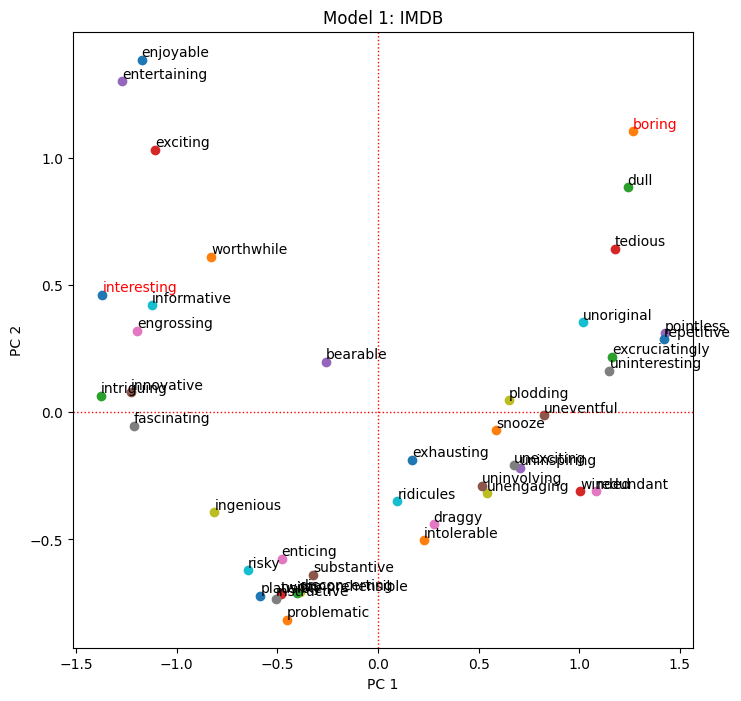

In [224]:
## Find the first and second principal components.
pca = PCA(n_components=2)

## Get unique words (Model 1)
a = WordVecModel.most_similar('interesting', topn = 20)
b = WordVecModel.most_similar('boring', topn = 20)
words = np.append(('interesting', 'boring'), pd.DataFrame(a+b)[0].unique())    
embs = [WordVecModel[w] for w in words]
pca_embs = pca.fit_transform(embs)

## Plot
plt.figure(figsize=(8, 8))
plt.title("Model 1: IMDB")
plt.axhline(y=0, color='r', linewidth=1, linestyle = ':')
plt.axvline(x=0, color='r', linewidth=1, linestyle = ':')
for i, w in enumerate(words):
    x, y = pca_embs[i, 0], pca_embs[i, 1]
    plt.scatter(x, y)    
    if w in ["interesting", "boring"]:
        plt.annotate(w, xy=(x, y), xytext=(x, y), ha='left', va="bottom", color='r')
    else:
        plt.annotate(w, xy=(x, y), xytext=(x, y), ha='left', va="bottom")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

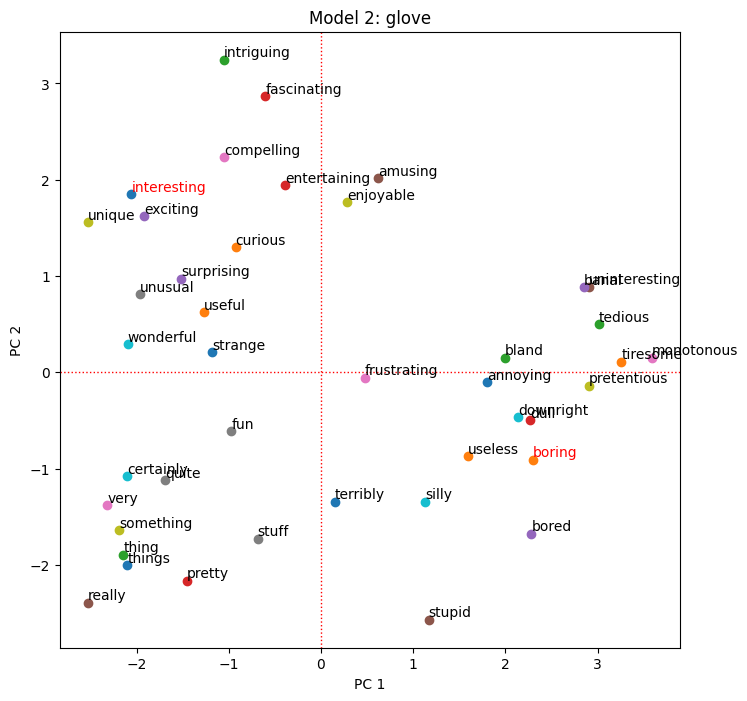

In [225]:
## Get unique words (Model 2)
a = GloveModel.most_similar('interesting', topn = 20)
b = GloveModel.most_similar('boring', topn = 20)
words = np.append(('interesting', 'boring'), pd.DataFrame(a+b)[0].unique())    
embs = [GloveModel[w] for w in words]
pca_embs = pca.fit_transform(embs)

plt.figure(figsize=(8, 8))
plt.title("Model 2: glove")
plt.axhline(y=0, color='r', linewidth=1, linestyle = ':')
plt.axvline(x=0, color='r', linewidth=1, linestyle = ':')
for i, w in enumerate(words):
    x, y = pca_embs[i, 0], pca_embs[i, 1]
    plt.scatter(x, y)    
    if w in ["interesting", "boring"]:
        plt.annotate(w, xy=(x, y), xytext=(x, y), ha='left', va="bottom", color='r')
    else:
        plt.annotate(w, xy=(x, y), xytext=(x, y), ha='left', va="bottom")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()